In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0 

--2023-04-20 14:21:08--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2023-04-20 14:21:10--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1e6dd5370e910e6bb73c34aa14.dl.dropboxusercontent.com/cd/0/inline/B6gGuCdxlcStIEgxt8XNMJ43YNrumSc3OUc0qh-VYvdijInt9U85GoKuU3gAke8-7K_sxDC6CwmFt4ObIN0mXvjus76qdYOApCm6DOlHT0058QWpqKj5am4Q2OVwq85P5gio1ICrnsnochqBLQgFmccLC665cuwymV1x8tce-EGjig/file# [following]
--2023-04-20 14:21:11--  https://uc1e6dd5370e910e6bb73c34aa14.dl.dropboxusercontent.com/cd/0/inline/B6gGuCdxlcStIEgxt8XNMJ43YNrumSc3OUc0qh-VYvdijInt9U85GoKuU3gAke8-7K_sxDC6Cwm

In [ ]:
!unzip dataset.zip?dl=0 -d sample_data

Streaming output truncated to the last 5000 lines.
  inflating: sample_data/train/sad/Training_65242339.jpg  
  inflating: sample_data/train/sad/Training_65267116.jpg  
  inflating: sample_data/train/sad/Training_65275626.jpg  
  inflating: sample_data/train/sad/Training_6529266.jpg  
  inflating: sample_data/train/sad/Training_65329617.jpg  
  inflating: sample_data/train/sad/Training_65338712.jpg  
  inflating: sample_data/train/sad/Training_65338797.jpg  
  inflating: sample_data/train/sad/Training_65387162.jpg  
  inflating: sample_data/train/sad/Training_65404494.jpg  
  inflating: sample_data/train/sad/Training_65426218.jpg  
  inflating: sample_data/train/sad/Training_65430136.jpg  
  inflating: sample_data/train/sad/Training_65437377.jpg  
  inflating: sample_data/train/sad/Training_6545735.jpg  
  inflating: sample_data/train/sad/Training_65463385.jpg  
  inflating: sample_data/train/sad/Training_65473985.jpg  
  inflating: sample_data/train/sad/Training_65502829.jpg  
  infla

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy
from tensorflow.keras import Model

In [ ]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "sample_data/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )
val_data = val_datagen.flow_from_directory(directory= "sample_data/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


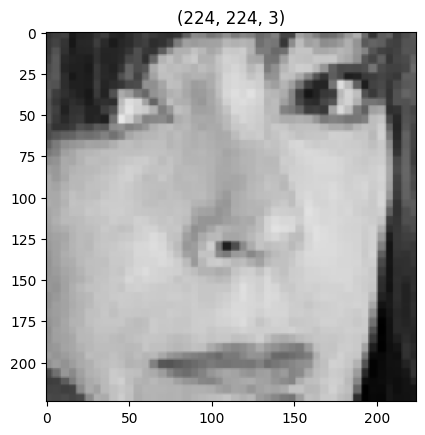

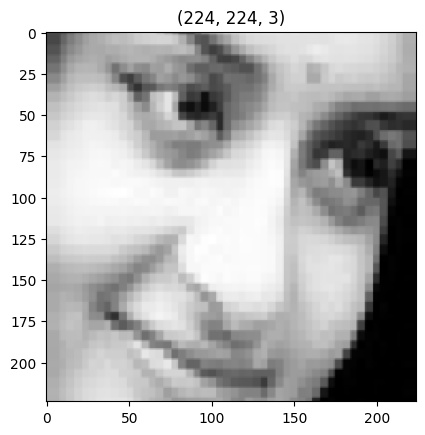

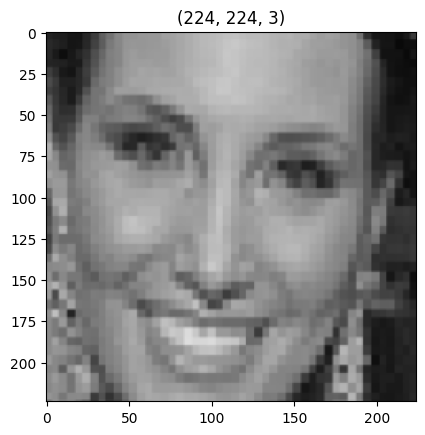

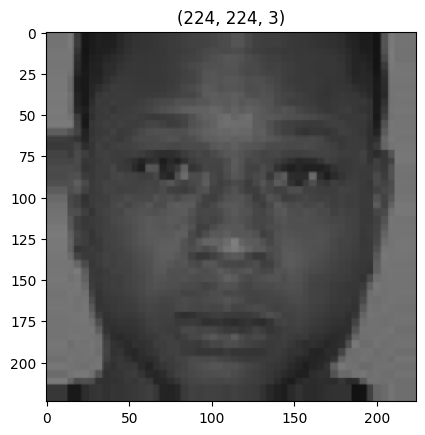

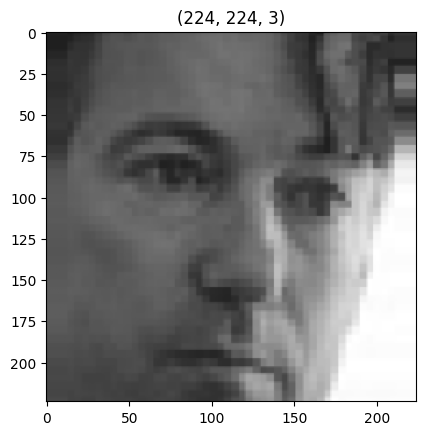

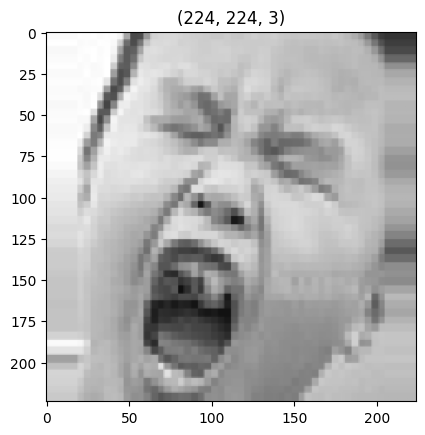

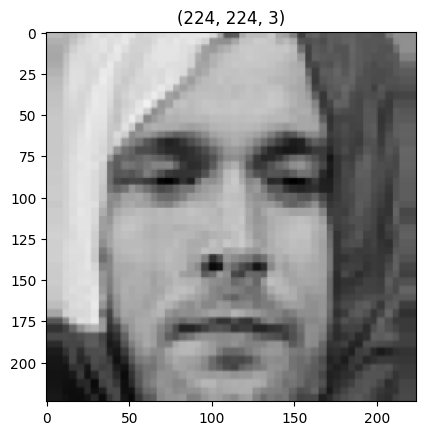

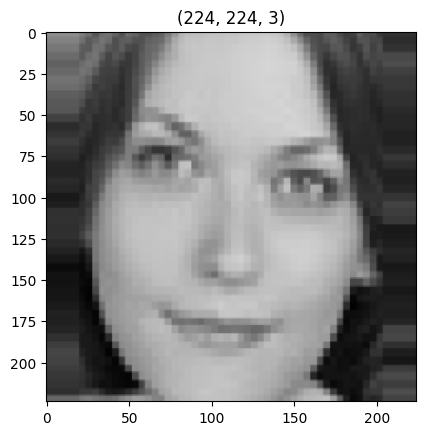

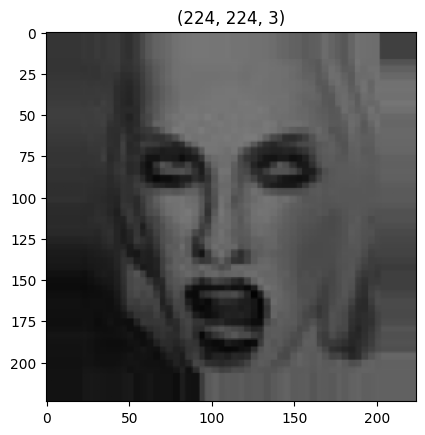

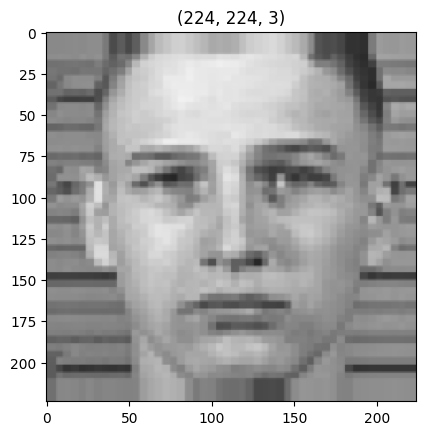

In [ ]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [ ]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 6.8664 - accuracy: 0.4969
Epoch 1: val_accuracy improved from -inf to 0.49609, saving model to best_model.h5
10/10 [==============================] - 6s 546ms/step - loss: 6.8664 - accuracy: 0.4969 - val_loss: 7.7241 - val_accuracy: 0.4961
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 6.1602 - accuracy: 0.5344
Epoch 2: val_accuracy did not improve from 0.49609
10/10 [==============================] - 5s 461ms/step - loss: 6.1602 - accuracy: 0.5344 - val_loss: 7.0687 - val_accuracy: 0.4883
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 6.2196 - accuracy: 0.5031
Epoch 3: val_accuracy improved from 0.49609 to 0.55078, saving model to best_model.h5
10/10 [==============================] - 4s 383ms/step - loss: 6.2196 - accuracy: 0.5031 - val_loss: 6.6090 - val_accuracy: 0.5508
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 7.3492 - accuracy: 0.5188
Epoch 4: va

In [ ]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

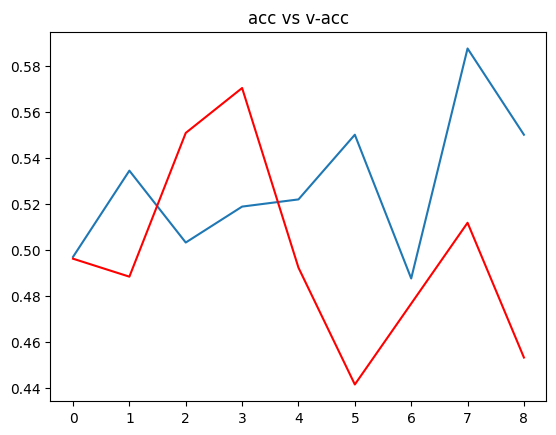

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

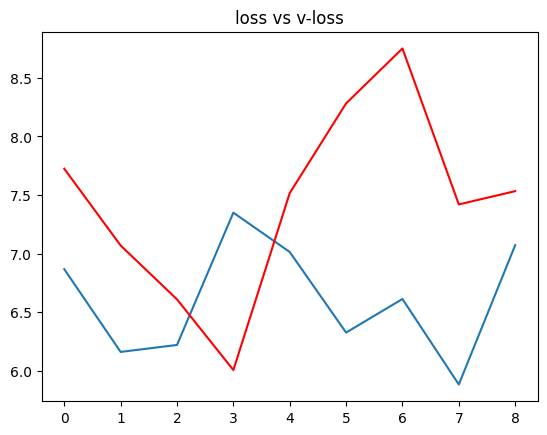

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 1s 505ms/step
 the image is of neutral


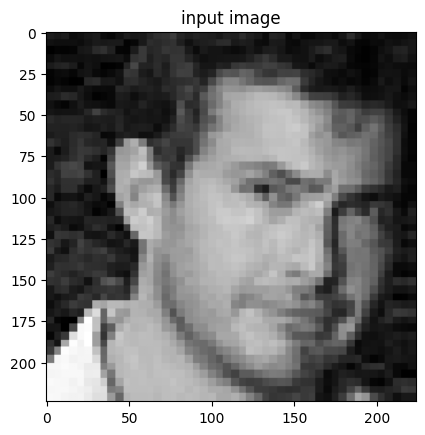

In [ ]:
# path for the image to see if it predics correct class

path = "sample_data/train/angry/Training_10120469.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()